<a href="https://colab.research.google.com/github/bagasteguhimani/Final-Project-Data-Science/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1450 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1381 non-null   float64
 16  lebar_

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               500 non-null    int64  
 1   daya_baterai        500 non-null    int64  
 2   bluetooth           500 non-null    int64  
 3   kecepatan_clock     500 non-null    float64
 4   dual_sim            500 non-null    int64  
 5   kamera_depan        500 non-null    int64  
 6   four_g              500 non-null    object 
 7   memori_internal     500 non-null    int64  
 8   tebal_hp            500 non-null    float64
 9   berat_hp            500 non-null    int64  
 10  jumlah_prosesor     500 non-null    int64  
 11  kamera_belakang_mp  500 non-null    int64  
 12  px_panjang          500 non-null    int64  
 13  px_lebar            500 non-null    int64  
 14  kapasitas_ram       500 non-null    int64  
 15  panjang_layar       500 non-null    int64  
 16  lebar_la

In [ ]:
#Cek Null
def null_table(df_train, df_test):
    print('DF Train')
    print(pd.isnull(df_train).sum())
    print('DF Test')
    print(pd.isnull(df_test).sum())

In [ ]:
null_table(df_train, df_test)

DF Train
index                   0
daya_baterai            0
bluetooth               0
kecepatan_clock        50
dual_sim                0
kamera_depan            0
four_g                  0
memori_internal         0
tebal_hp                0
berat_hp                0
jumlah_prosesor         0
kamera_belakang_mp      0
px_panjang              0
px_lebar                0
kapasitas_ram           0
panjang_layar         119
lebar_layar             0
waktu_telfon            0
three_g                 0
touch_screen            0
wifi                    0
price_range             0
dtype: int64
DF Test
index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar   

In [ ]:
#merubah "?"
df_train.replace('?',np.nan, inplace=True)
df_test.replace('?',np.nan, inplace=True)

In [ ]:
#Mengisi NA pada df_train
df_train['kecepatan_clock'].fillna(df_train['kecepatan_clock'].mode()[0],inplace=True)
df_train['panjang_layar'].fillna(df_train['panjang_layar'].mode()[0],inplace=True)

In [ ]:
train = df_train.copy()
test = df_test.copy()

In [ ]:
train

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,Tidak,63,0.7,189,7,14,145,1903,2958,17.0,1,19,0,1,0,2000k-3000k
1,937,764,1,1.2,1,1,Tidak,13,1.0,152,8,2,361,511,3148,18.0,7,6,1,1,0,2000k-3000k
2,1658,1812,1,1.3,1,4,Ya,42,1.0,162,7,15,380,1550,3338,18.0,13,11,1,1,1,>3000k
3,529,1821,0,0.9,0,9,Ya,12,0.3,114,1,18,97,1803,2430,7.0,4,6,1,1,1,2000k-3000k
4,895,1790,1,2.3,1,3,Ya,49,0.5,100,3,11,396,1980,3568,6.0,2,18,1,0,1,>3000k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,835,1224,1,1.6,0,9,Tidak,33,1.0,157,1,18,522,563,3796,10.0,5,13,1,1,0,>3000k
1496,1216,1158,0,0.7,1,1,Ya,29,0.7,123,2,20,311,1796,1542,17.0,9,15,1,0,1,1000k-<2000k
1497,1653,1190,0,2.0,1,0,Tidak,40,0.2,93,5,1,1399,1646,3610,13.0,7,9,0,0,1,>3000k
1498,559,1191,0,2.4,1,2,Tidak,13,0.9,169,1,7,179,1813,1028,14.0,6,8,1,1,1,0-<1000k


In [ ]:
test

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,405,1454,1,0.5,1,1,Tidak,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1,1190,1092,1,0.5,1,10,Tidak,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
2,1132,1524,1,1.8,1,0,Tidak,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
3,731,1807,1,2.1,0,2,Tidak,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
4,1754,1086,1,1.7,1,0,Ya,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,936,805,0,0.8,0,1,Tidak,34,0.6,88,6,2,1262,1538,3647,18,11,9,1,0,1
496,1524,1162,0,1.0,0,0,Tidak,50,0.5,104,4,10,332,866,1404,10,3,15,1,1,1
497,1415,1759,1,1.4,0,10,Ya,15,0.4,101,4,13,382,1163,2107,18,5,16,1,1,0
498,1223,514,1,1.6,0,7,Ya,37,0.1,172,1,9,956,1723,3392,12,8,5,1,1,1


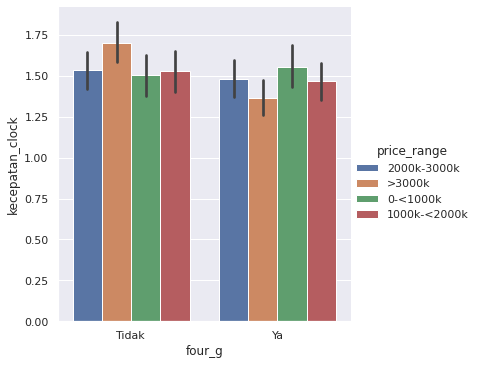

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.catplot(data=train, x='four_g', y='kecepatan_clock', hue='price_range', kind='bar')

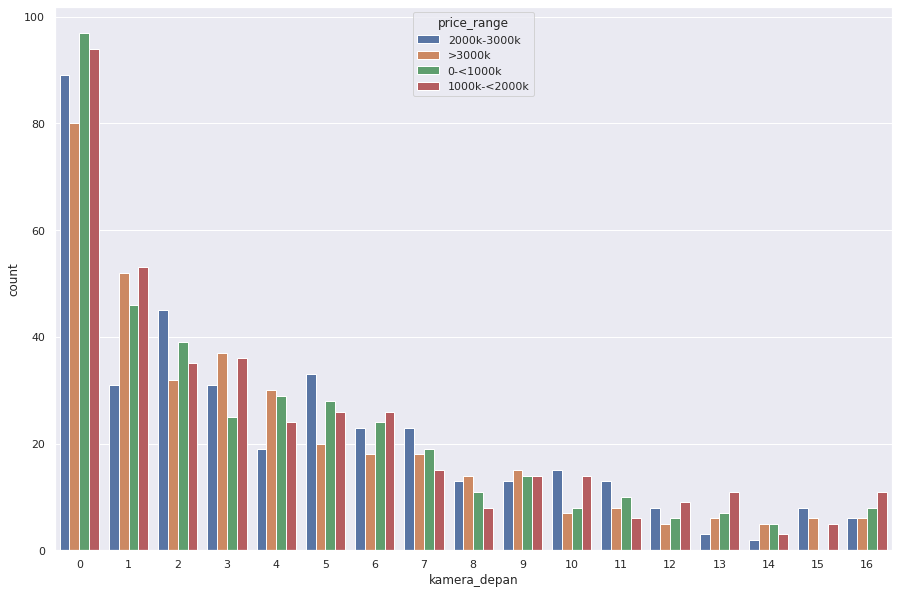

In [ ]:
sns.countplot(data=train, x='kamera_depan', hue='price_range')

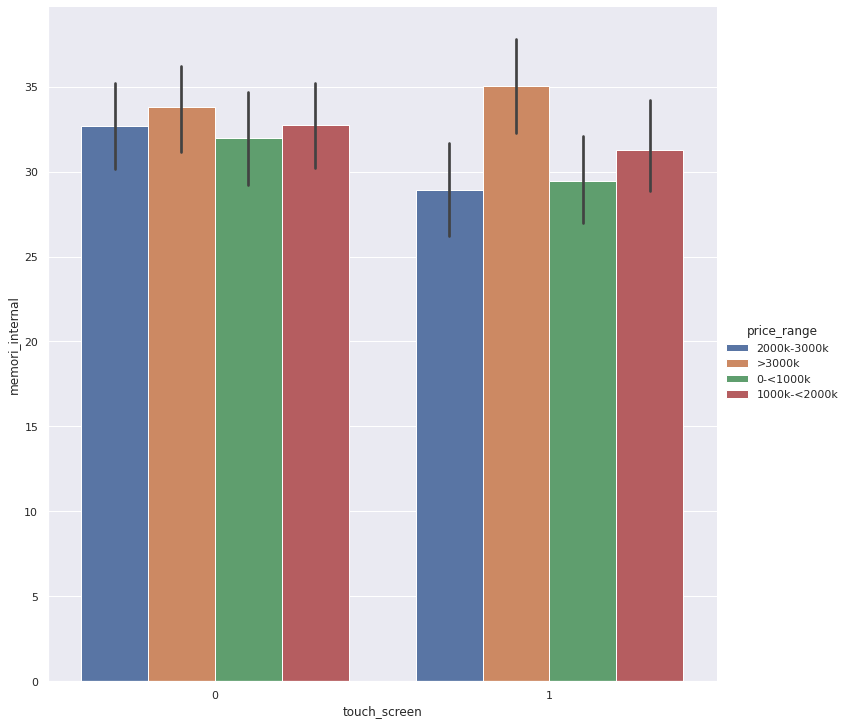

In [ ]:
sns.catplot(data=train, x='touch_screen', y='memori_internal', hue='price_range', kind='bar', height=10)

In [ ]:
null_table(train,test)

DF Train
index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar           0
waktu_telfon          0
three_g               0
touch_screen          0
wifi                  0
price_range           0
dtype: int64
DF Test
index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar           0
waktu_telfon          0
three_g   

In [ ]:
train.dtypes

index                   int64
daya_baterai            int64
bluetooth               int64
kecepatan_clock       float64
dual_sim                int64
kamera_depan            int64
four_g                 object
memori_internal         int64
tebal_hp              float64
berat_hp                int64
jumlah_prosesor         int64
kamera_belakang_mp      int64
px_panjang              int64
px_lebar                int64
kapasitas_ram           int64
panjang_layar         float64
lebar_layar             int64
waktu_telfon            int64
three_g                 int64
touch_screen            int64
wifi                    int64
price_range            object
dtype: object

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder

#encode 4g train
fg = LabelEncoder()
fg.fit(train['four_g'])

encode_fg = fg.transform(train['four_g'])
train['four_g'] = encode_fg

#encode 4g test
fg_test = LabelEncoder()
fg_test.fit(test['four_g'])

encode_fgTest = fg_test.transform(test['four_g'])
test['four_g'] = encode_fgTest

#replace Price-range 
train['price_range'].replace({'0-<1000k':0, '1000k-<2000k':1, '2000k-3000k':2, '>3000k':3})

0       2
1       2
2       3
3       2
4       3
       ..
1495    3
1496    1
1497    3
1498    0
1499    1
Name: price_range, Length: 1500, dtype: int64

In [ ]:
#replace price range
obj_dict = {
    '0-<1000k':0, 
    '1000k-<2000k':1, 
    '2000k-3000k':2, 
    '>3000k':3
}
train['price_range']=train['price_range'].replace(obj_dict)


In [ ]:
train

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,0,63,0.7,189,7,14,145,1903,2958,17.0,1,19,0,1,0,2
1,937,764,1,1.2,1,1,0,13,1.0,152,8,2,361,511,3148,18.0,7,6,1,1,0,2
2,1658,1812,1,1.3,1,4,1,42,1.0,162,7,15,380,1550,3338,18.0,13,11,1,1,1,3
3,529,1821,0,0.9,0,9,1,12,0.3,114,1,18,97,1803,2430,7.0,4,6,1,1,1,2
4,895,1790,1,2.3,1,3,1,49,0.5,100,3,11,396,1980,3568,6.0,2,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,835,1224,1,1.6,0,9,0,33,1.0,157,1,18,522,563,3796,10.0,5,13,1,1,0,3
1496,1216,1158,0,0.7,1,1,1,29,0.7,123,2,20,311,1796,1542,17.0,9,15,1,0,1,1
1497,1653,1190,0,2.0,1,0,0,40,0.2,93,5,1,1399,1646,3610,13.0,7,9,0,0,1,3
1498,559,1191,0,2.4,1,2,0,13,0.9,169,1,7,179,1813,1028,14.0,6,8,1,1,1,0


In [ ]:
test

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,405,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1,1190,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
2,1132,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
3,731,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
4,1754,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,936,805,0,0.8,0,1,0,34,0.6,88,6,2,1262,1538,3647,18,11,9,1,0,1
496,1524,1162,0,1.0,0,0,0,50,0.5,104,4,10,332,866,1404,10,3,15,1,1,1
497,1415,1759,1,1.4,0,10,1,15,0.4,101,4,13,382,1163,2107,18,5,16,1,1,0
498,1223,514,1,1.6,0,7,1,37,0.1,172,1,9,956,1723,3392,12,8,5,1,1,1


In [ ]:
train.dtypes

index                   int64
daya_baterai            int64
bluetooth               int64
kecepatan_clock       float64
dual_sim                int64
kamera_depan            int64
four_g                  int64
memori_internal         int64
tebal_hp              float64
berat_hp                int64
jumlah_prosesor         int64
kamera_belakang_mp      int64
px_panjang              int64
px_lebar                int64
kapasitas_ram           int64
panjang_layar         float64
lebar_layar             int64
waktu_telfon            int64
three_g                 int64
touch_screen            int64
wifi                    int64
price_range             int64
dtype: object

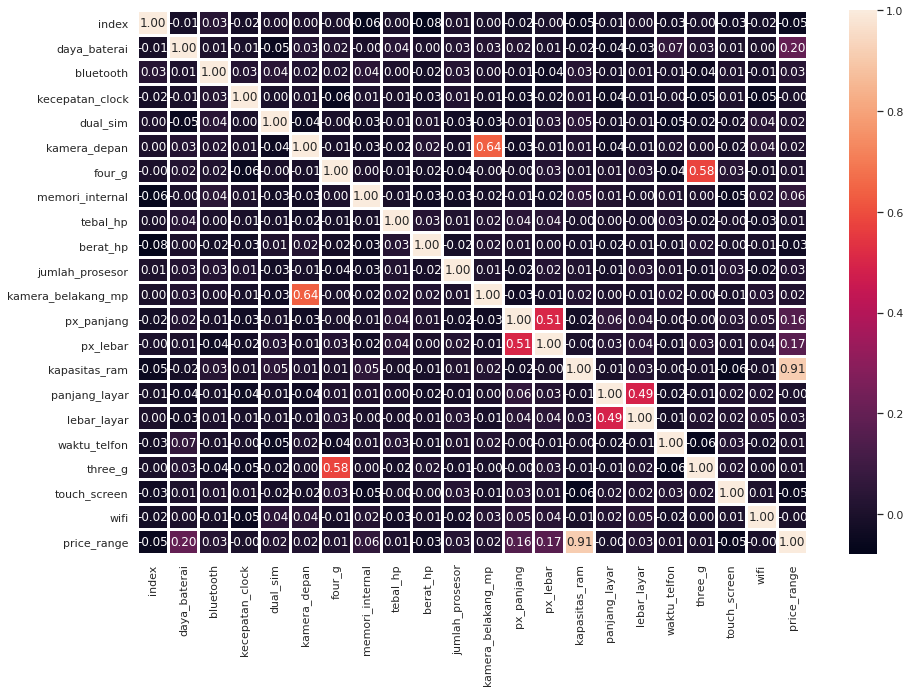

In [ ]:
#menggunakan heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(train.corr(), annot=True, fmt='.2f', linewidth=2)

In [ ]:
train

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,0,63,0.7,189,7,14,145,1903,2958,17.0,1,19,0,1,0,2
1,937,764,1,1.2,1,1,0,13,1.0,152,8,2,361,511,3148,18.0,7,6,1,1,0,2
2,1658,1812,1,1.3,1,4,1,42,1.0,162,7,15,380,1550,3338,18.0,13,11,1,1,1,3
3,529,1821,0,0.9,0,9,1,12,0.3,114,1,18,97,1803,2430,7.0,4,6,1,1,1,2
4,895,1790,1,2.3,1,3,1,49,0.5,100,3,11,396,1980,3568,6.0,2,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,835,1224,1,1.6,0,9,0,33,1.0,157,1,18,522,563,3796,10.0,5,13,1,1,0,3
1496,1216,1158,0,0.7,1,1,1,29,0.7,123,2,20,311,1796,1542,17.0,9,15,1,0,1,1
1497,1653,1190,0,2.0,1,0,0,40,0.2,93,5,1,1399,1646,3610,13.0,7,9,0,0,1,3
1498,559,1191,0,2.4,1,2,0,13,0.9,169,1,7,179,1813,1028,14.0,6,8,1,1,1,0


In [ ]:
#pisah 
X = train.drop(['price_range'], axis=1)
y = train['price_range']

In [ ]:
cols = X.columns
cols2 = test.columns

In [ ]:
#melakukan rescaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(test)

X = pd.DataFrame(X, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols2)

In [ ]:
X.describe()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
count,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03
mean,5.440093e-17,2.161234e-16,3.102703e-16,1.421085e-17,-1.965835e-16,4.440892e-18,-9.799569e-17,4.561629e-17,-2.589040e-16,1.739349e-16,2.196021e-16,4.366877e-17,8.948398e-17,-5.965598e-17,1.420345e-16,-1.502502e-16,-8.807769e-18,1.129467e-16,2.047251e-16,4.477900e-17,-1.871096e-16
std,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00
min,-1.747158e+00,-1.657466e+00,-9.762812e-01,-1.204561e+00,-1.028403e+00,-9.871396e-01,-1.033908e+00,-1.635172e+00,-1.392746e+00,-1.687083e+00,-1.550733e+00,-1.617695e+00,-1.472692e+00,-1.759731e+00,-1.719323e+00,-1.775549e+00,-1.325412e+00,-1.648641e+00,-1.779513e+00,-9.893896e-01,-1.028403e+00
25%,-8.615328e-01,-8.882831e-01,-9.762812e-01,-1.085581e+00,-1.028403e+00,-7.514329e-01,-1.033908e+00,-8.708860e-01,-1.045832e+00,-8.888058e-01,-6.713003e-01,-9.567820e-01,-8.153884e-01,-8.798273e-01,-8.375325e-01,-8.576362e-01,-8.715037e-01,-9.184536e-01,5.619515e-01,-9.893896e-01,-1.028403e+00
50%,-1.099178e-03,-2.401316e-02,-9.762812e-01,-1.337344e-01,9.723812e-01,-2.800196e-01,9.672042e-01,-5.200786e-02,-5.088080e-03,-4.998737e-03,-2.315839e-01,3.458779e-02,-1.704233e-01,-2.226633e-03,5.128947e-03,2.897544e-01,-1.906414e-01,-5.719798e-03,5.619515e-01,-9.893896e-01,9.723812e-01
75%,8.749708e-01,8.498787e-01,1.024295e+00,9.370927e-01,9.723812e-01,6.628072e-01,9.672042e-01,8.760540e-01,1.035656e+00,8.502985e-01,1.087565e+00,8.607293e-01,6.831740e-01,8.782533e-01,8.205402e-01,9.781887e-01,7.171749e-01,9.070140e-01,5.619515e-01,1.010724e+00,9.723812e-01
max,1.724112e+00,1.731694e+00,1.024295e+00,1.769958e+00,9.723812e-01,2.784167e+00,9.672042e-01,1.749524e+00,1.729485e+00,1.734106e+00,1.527281e+00,1.686871e+00,2.834553e+00,1.690783e+00,1.766846e+00,1.437145e+00,2.759762e+00,1.637201e+00,5.619515e-01,1.010724e+00,9.723812e-01


In [ ]:
#Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_RFC = LogisticRegression()
param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 
    
            }

rscv = RandomizedSearchCV(model_RFC, param_grid, scoring="f1_micro", cv=10)
rscv.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1_micro', 

In [ ]:
rscv.best_params_

{'penalty': 'none'}

In [ ]:
rscv.best_score_

0.968

In [ ]:
model_RFC = rscv.best_estimator_
rscv.best_score_

0.968

In [ ]:
y_predict = model_RFC.predict(X_test)
y_predict

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 2, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [ ]:
submission =pd.DataFrame({'index':test['index'].values, 'price_range':y_predict})
submission.head()

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2


In [ ]:
submission.to_csv('SubmissionFinal.csv', index=False)